Files already downloaded and verified
Files already downloaded and verified
[1,   100] loss: 2.300
[1,   200] loss: 2.292
[1,   300] loss: 2.280
[1,   400] loss: 2.259
[1,   500] loss: 2.208
[1,   600] loss: 2.135
[1,   700] loss: 2.059
[1,   800] loss: 2.011
[1,   900] loss: 1.975
[1,  1000] loss: 1.938
[1,  1100] loss: 1.915
[1,  1200] loss: 1.868
[1,  1300] loss: 1.874
[1,  1400] loss: 1.859
[1,  1500] loss: 1.828
[2,   100] loss: 1.783
[2,   200] loss: 1.750
[2,   300] loss: 1.773
[2,   400] loss: 1.721
[2,   500] loss: 1.740
[2,   600] loss: 1.657
[2,   700] loss: 1.665
[2,   800] loss: 1.664
[2,   900] loss: 1.639
[2,  1000] loss: 1.619
[2,  1100] loss: 1.646
[2,  1200] loss: 1.589
[2,  1300] loss: 1.598
[2,  1400] loss: 1.608
[2,  1500] loss: 1.602
[3,   100] loss: 1.552
[3,   200] loss: 1.579
[3,   300] loss: 1.520
[3,   400] loss: 1.548
[3,   500] loss: 1.567
[3,   600] loss: 1.538
[3,   700] loss: 1.543
[3,   800] loss: 1.532
[3,   900] loss: 1.538
[3,  1000] loss: 1.525
[3, 

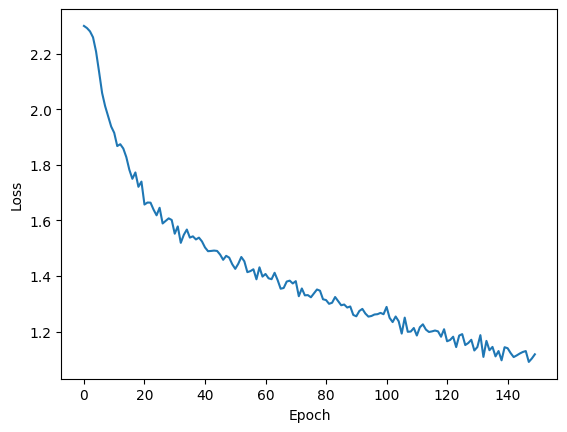

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Загрузка и аугментация данных
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Определение сверточной нейронной сети
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = SimpleCNN()
net = net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Обучение нейронной сети
losses = []
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            losses.append(running_loss / 100)
            running_loss = 0.0

print('Finished Training')

# Визуализация процесса обучения
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()